In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

df = pd.read_csv("../data/raw/JFK Airport Weather Data.csv")
df.head()


,STATION,NAME,DATE,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV01
0,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1960-01-01,NaN,NaN,NaN,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1960-01-02,NaN,NaN,NaN,NaN,NaN,0.08,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1960-01-03,NaN,NaN,NaN,NaN,NaN,0.68,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1960-01-04,NaN,NaN,NaN,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",1960-01-05,NaN,NaN,NaN,NaN,NaN,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **GENERAL INFO**

In [24]:
print("Dataset shape:")
print(f"Rows: {df.shape[0]:,}")
print(f"Columns: {df.shape[1]}")
df["DATE"] = pd.to_datetime(df["DATE"])
print("Date range:")
print(f"From {df['DATE'].min().date()} to {df['DATE'].max().date()}")

summary = pd.DataFrame({
    "dtype": df.dtypes,
    "missing_count": df.isna().sum(),
    "missing_%": (df.isna().mean() * 100).round(2),
    "unique_values": df.nunique()
})

summary.sort_values("missing_%", ascending=False)

Dataset shape:
Rows: 20,089
Columns: 46
Date range:
From 1960-01-01 to 2014-12-31


,dtype,missing_count,missing_%,unique_values
WT19,float64,20088,100.00,1
WDFM,float64,20088,100.00,1
WV01,float64,20088,100.00,1
WSFM,float64,20087,99.99,2
WT21,float64,20084,99.98,1
WT11,float64,20075,99.93,1
TSUN,float64,20058,99.85,3
WT15,float64,20047,99.79,1
WT22,float64,20040,99.76,1
WT17,float64,20029,99.70,1


### Temperature Summary Statistics

TMAX and TMIN are available for most observations, while TAVG contains substantial
missing values and requires reconstruction. Temperature ranges are wide and
physically plausible, reflecting strong seasonal variability.

Mean and quartile values indicate a temperate climate with no obvious outliers.
The consistency between TMAX, TMIN, and TAVG suggests good data quality and
supports their use in regression modeling, with TMAX as the target variable.


In [ ]:
df[["TMAX", "TMIN", "TAVG"]].describe()

,TMAX,TMIN,TAVG
count,20088.000000,20088.000000,3313.000000
mean,61.346575,46.944594,55.284636
std,17.560879,16.408655,16.543682
min,8.000000,-2.000000,9.000000
25%,47.000000,34.000000,42.000000
50%,62.000000,47.000000,56.000000
75%,77.000000,62.000000,70.000000
max,104.000000,82.000000,91.000000


### Long-Term Temperature Trend

The 365-day rolling mean of daily maximum temperature smooths short-term
fluctuations and highlights long-term behavior. The series shows clear
multi-year variability but no abrupt structural breaks, indicating stable
climatic patterns over time.

Small oscillations reflect natural climate variability, while the overall
trend remains relatively consistent, supporting the use of historical
temperature patterns for predictive modeling.


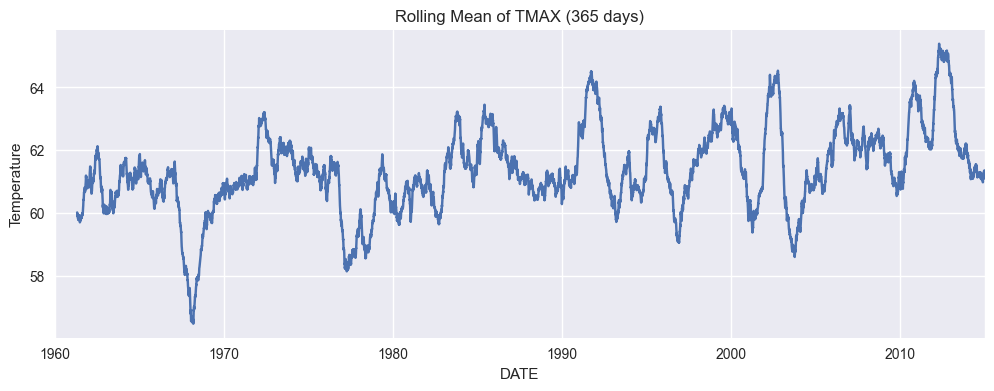

In [31]:
df.set_index("DATE")["TMAX"].rolling(365).mean().plot(figsize=(12, 4))
plt.title("Rolling Mean of TMAX (365 days)")
plt.ylabel("Temperature")
plt.show()


### Precipitation Characteristics

Only about one third of days record non-zero precipitation, confirming that
precipitation is an event-driven variable. Summary statistics show a highly
skewed distribution, with a median of zero and a small interquartile range,
while rare extreme events reach much higher values.

The cumulative distribution further illustrates this imbalance: most days
cluster at or near zero precipitation, followed by a sharp increase driven by
a small number of heavy rainfall events. This behavior highlights the limited
predictive value of mean precipitation and motivates the use of binary and
rolling features for weather classification.


In [69]:
print('Precipitation days percentage: ', '{} %'.format(100*(df["PRCP"] > 0).mean().round(4)))
df["PRCP"].describe()

Precipitation days percentage:  32.47 %


count    20087.000000
mean         0.115897
std          0.332272
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max          7.800000
Name: PRCP, dtype: float64

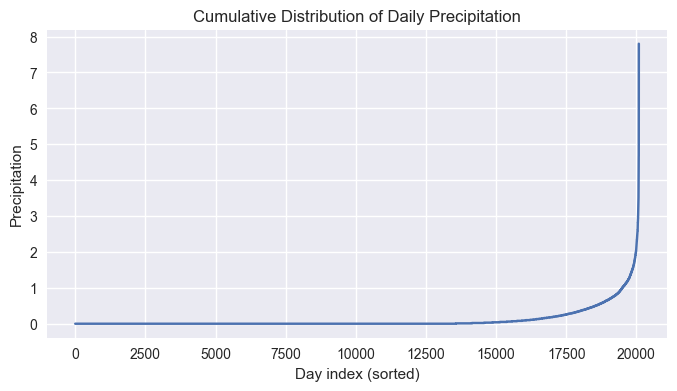

In [38]:
df["PRCP"].sort_values().reset_index(drop=True).plot(
    figsize=(8, 4)
)

plt.title("Cumulative Distribution of Daily Precipitation")
plt.xlabel("Day index (sorted)")
plt.ylabel("Precipitation")
plt.show()


In [ ]:
print('Snow days percentage: ', '{} %'.format(100*(df["SNOW"] > 0).mean().round(4)))
df["SNOW"].describe()

Snow days percentage:  3.83%


count    20085.000000
mean         0.065900
std          0.580099
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         21.600000
Name: SNOW, dtype: float64

### Seasonal Patterns by Month

The monthly averages reveal a strong and smooth seasonal cycle in maximum
temperature, with a clear peak during summer months and a minimum in winter.
This pronounced seasonality highlights the importance of temporal features
such as month and day-of-year for temperature prediction.

In contrast, average monthly precipitation shows much weaker seasonality.
While some variation is present, precipitation levels remain relatively stable
throughout the year, indicating that precipitation is less driven by seasonal
cycles and more by short-term weather events.


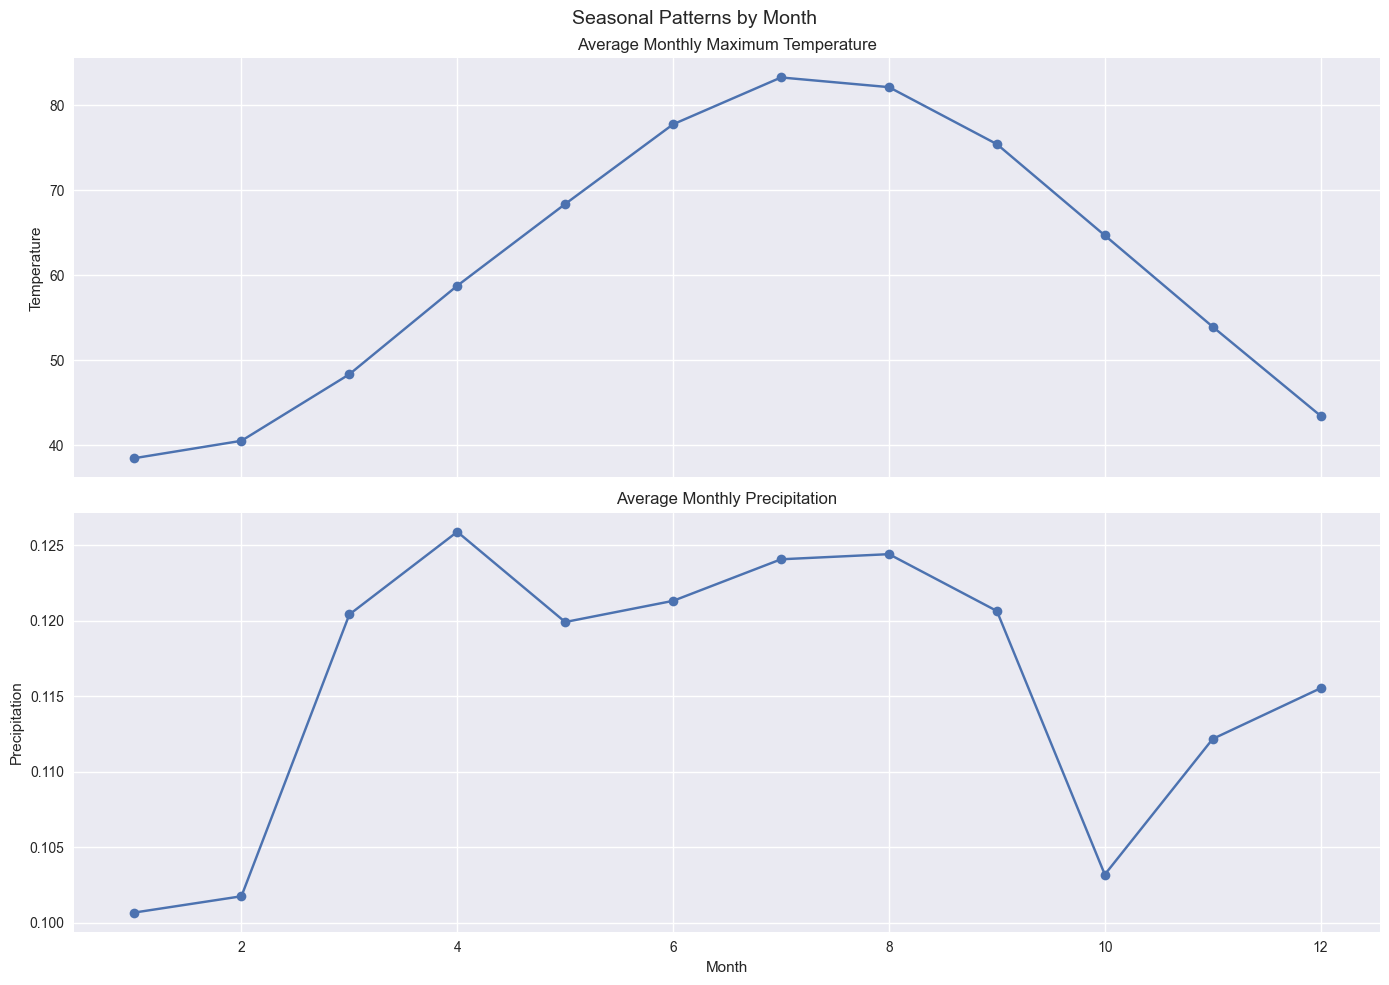

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

df.groupby("month")["TMAX"].mean().plot(
    ax=axes[0],
    marker="o"
)
axes[0].set_title("Average Monthly Maximum Temperature")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Temperature")

df.groupby("month")["PRCP"].mean().plot(
    ax=axes[1],
    marker="o"
)
axes[1].set_title("Average Monthly Precipitation")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Precipitation")

plt.suptitle("Seasonal Patterns by Month", fontsize=14)
plt.tight_layout()
plt.show()



### Daily Temperature Pattern

Averaging maximum temperature by day of the year reveals a smooth and nearly
sinusoidal annual cycle. Temperatures gradually increase from winter to summer,
reach a peak in mid-year, and then decline toward winter.

This stable and repeatable pattern represents the climatological norm and
highlights the strong dependence of temperature on the day of the year. It
justifies the inclusion of day-of-year–based features and long-term daily
averages in temperature prediction models.


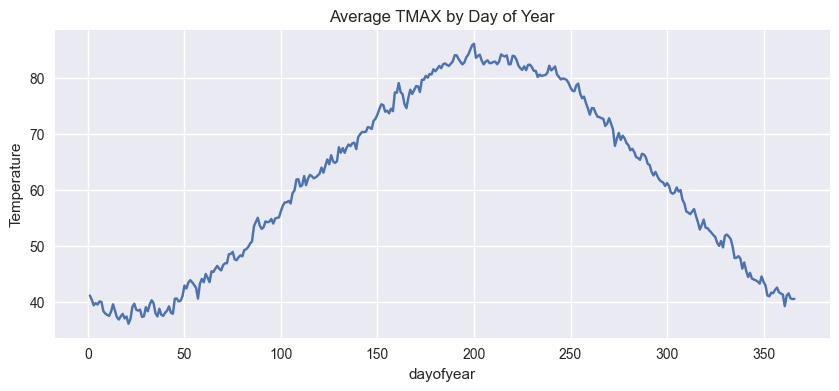

In [48]:
df.groupby("dayofyear")["TMAX"].mean().plot(figsize=(10, 4))
plt.title("Average TMAX by Day of Year")
plt.ylabel("Temperature")
plt.show()


### Correlation Analysis

The correlation matrix shows very strong relationships between temperature
variables (TMAX, TMIN, and TAVG), indicating that they capture closely related
aspects of the same underlying process. This confirms their usefulness for
temperature regression, while also suggesting potential redundancy.

In contrast, precipitation, snowfall, and wind speed exhibit weak correlations
with temperature variables. This implies that these features have limited direct
predictive power for temperature but are more relevant for classifying weather
conditions.


In [49]:
numeric_cols = ["TMAX", "TMIN", "TAVG", "PRCP", "SNOW", "AWND"]
df[numeric_cols].corr()


,TMAX,TMIN,TAVG,PRCP,SNOW,AWND
TMAX,1.000000,0.954949,0.987547,-0.006323,-0.182509,-0.262104
TMIN,0.954949,1.000000,0.986765,0.054871,-0.166719,-0.265165
TAVG,0.987547,0.986765,1.000000,0.017904,-0.186225,-0.207944
PRCP,-0.006323,0.054871,0.017904,1.000000,0.147145,0.103926
SNOW,-0.182509,-0.166719,-0.186225,0.147145,1.000000,0.147565
AWND,-0.262104,-0.265165,-0.207944,0.103926,0.147565,1.000000


### Weather Type Distribution

The distribution of derived weather types is highly imbalanced.
Sunny conditions dominate the dataset, while Rainy, Foggy, Stormy,
and Snowy days occur much less frequently.

This class imbalance reflects real-world weather patterns but has
important implications for modeling. In particular, accuracy alone
would be a misleading metric, and evaluation should rely on metrics
such as F1-score and class-specific performance. Class imbalance also
motivates the use of class weighting or robust classification models.


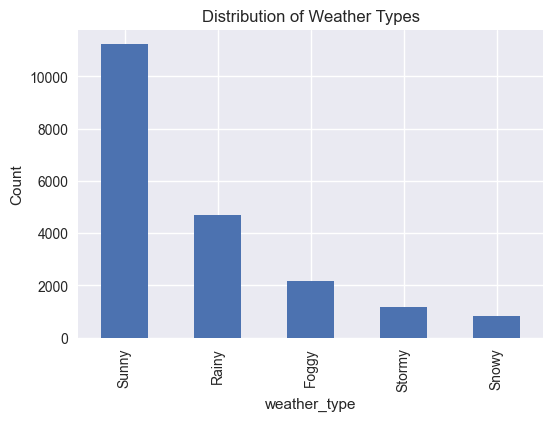

In [54]:
from preprocess.labels import classify_weather

df['weather_type'] = df.apply(classify_weather, axis=1)
df["weather_type"].value_counts(normalize=True)
df["weather_type"].value_counts().plot(kind="bar", figsize=(6, 4))
plt.title("Distribution of Weather Types")
plt.ylabel("Count")
plt.show()
